24F-0040
Laiba
Artificial Intelligence
Assignment 01
Question 07
Path finder using different search Algorithms.

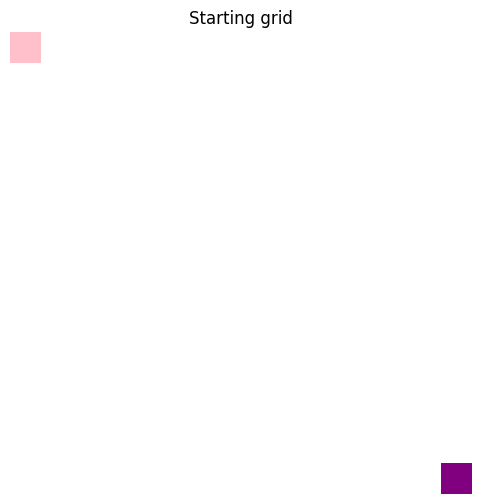

Choose Algorithm
1 BFS
2 DFS
3 UCS
4 DLS
5 IDDFS
6 BIDIRECTIONAL


Enter choice:  2


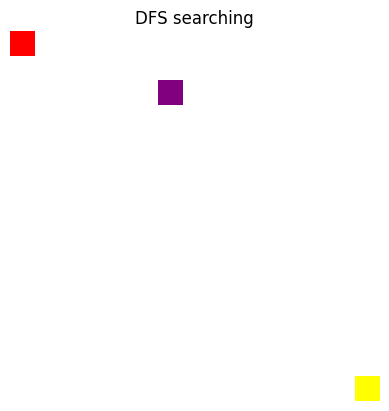

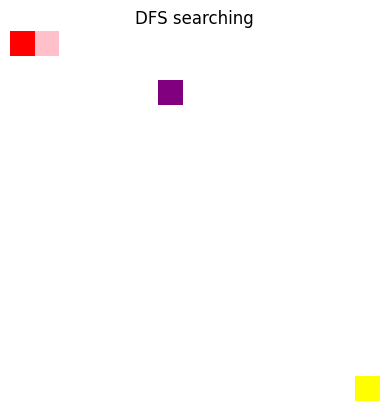

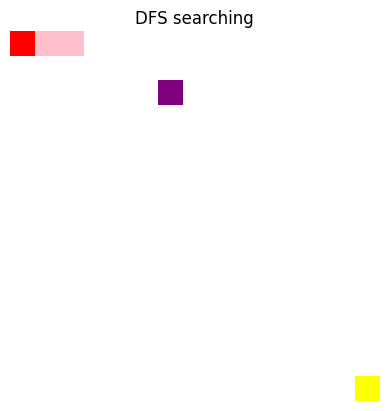

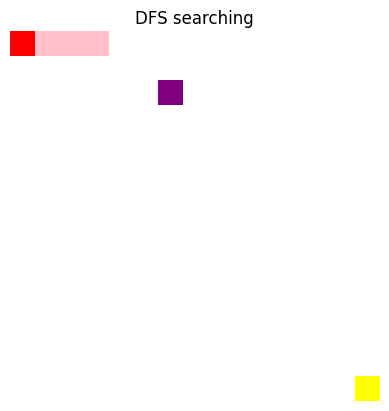

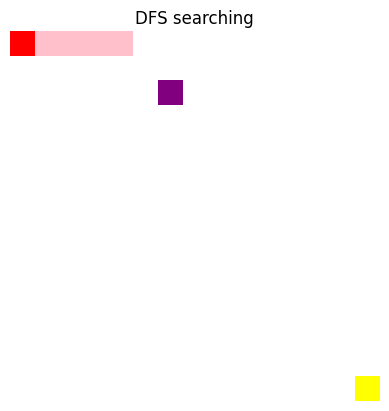

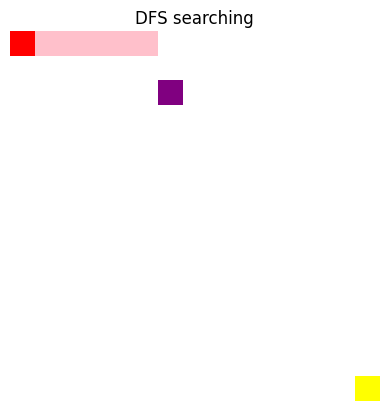

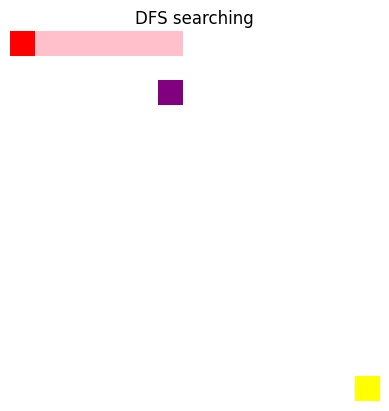

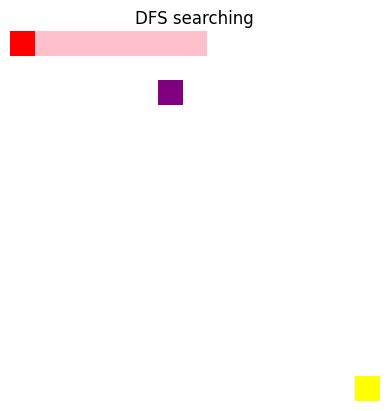

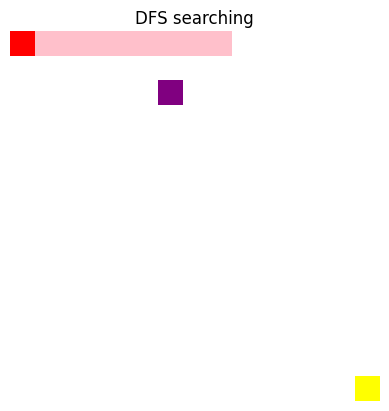

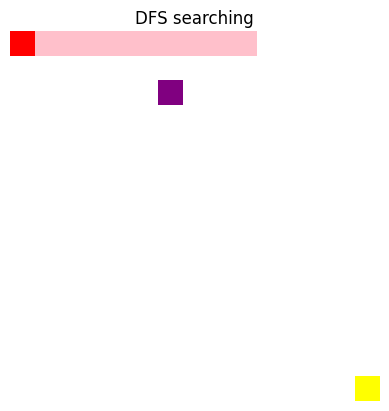

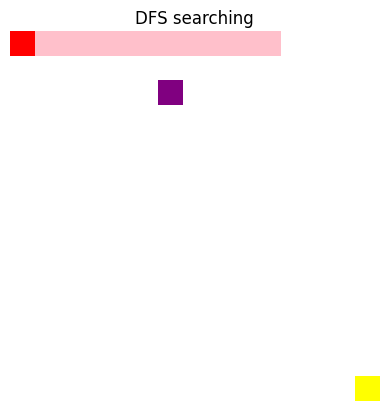

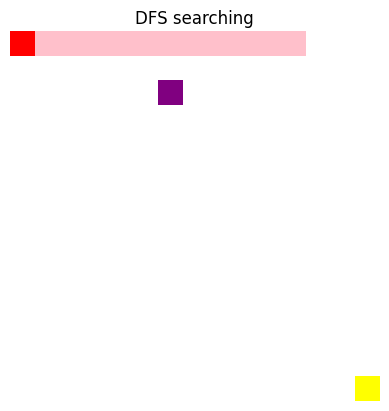

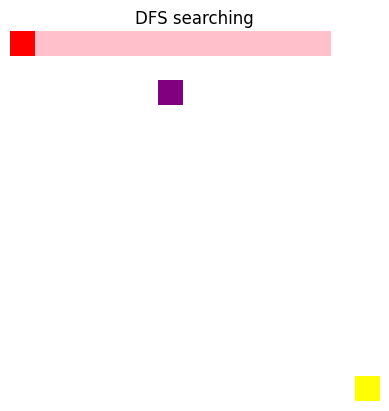

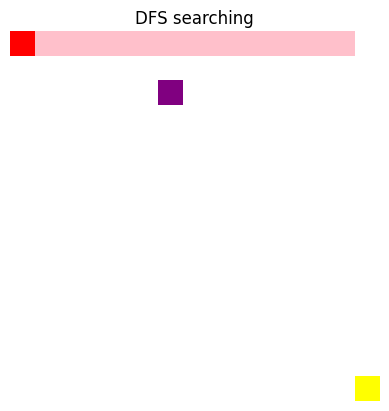

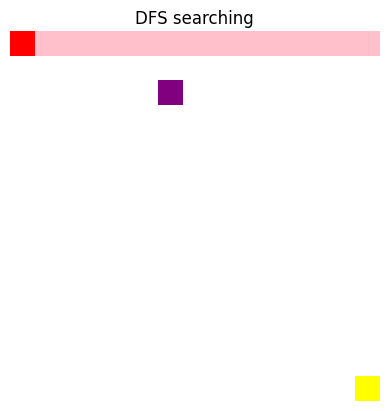

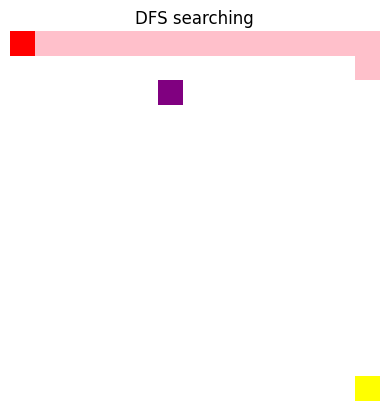

In [ ]:
import numpy as np #used for grid handling
import matplotlib.pyplot as plt #for GUI
import random # for dynamic obstacles
import time #measures time 
from collections import deque #for search Algorithms 
import heapq # for uniform cost search
from matplotlib import colors #used to import colors 

#draw grid on screen
def make_grid(grid,title):
    plt.clf() #clear screen(clf=clear the current figure)
    plt.imshow(grid,cmap=clr) #shows image 
    plt.title(title)
    plt.axis('off')
    plt.pause(0.2)
    
#check the walls
def walls(r,c):
    if r<0 or c<0 or r>=rows or c>=col: #
        return False
    if grid[r][c]==1 or grid[r][c]==7:
        return False
    return True

#check obstacles
def obst():
    if random.random()<obs:
        r=random.randint(0,rows-1)
        c=random.randint(0,col-1)
        if grid[r][c]==0:
            grid[r][c]=7

#BFS
def BFS():
    queue=deque()
    queue.append(start)
    parent={}
    visited=set()
    while queue:
        curr=queue.popleft()
        if curr==goal:
            return parent
        if curr in visited:
            continue
        visited.add(curr)
        r,c=curr
        if grid[r][c]==0:
            grid[r][c]=5
        obst()
        make_grid(grid,"BFS searching")
        for dr,dc in DIRECTIONS:
            nr,nc=r+dr,c+dc
            if walls(nr,nc) and (nr,nc) not in visited:
                queue.append((nr,nc))
                parent[(nr,nc)]=curr
    print("No path found")
    return None
#DFS 
def DFS():
    stack=[start]
    parent={}
    visited=set()

    while stack:
        curr=stack.pop()
        if curr==goal:
            return parent
        if curr in visited:
            continue
        visited.add(curr)
        r,c=curr
        if grid[r][c]==0:
            grid[r][c]=5
        obst()
        make_grid(grid,"DFS searching")
        for dr,dc in reversed(DIRECTIONS):
            nr,nc=r+dr,c+dc
            if walls(nr,nc) and (nr,nc) not in visited:
                stack.append((nr,nc))
                parent[(nr,nc)]=curr
    return None


#UCS(uniform cost search)
def UCS():
    pq=[]
    heapq.heappush(pq,(0,start))
    parent={}
    cost={}
    cost[start]=0

    while pq:
        curr_cost,curr=heapq.heappop(pq)
        if curr==goal:
            return parent
        r,c=curr
        if grid[r][c]==0:
            grid[r][c]=5
        obst()
        make_grid(grid,"UCS searching")
        for dr,dc in DIRECTIONS:
            nr,nc=r+dr,c+dc
            new_cost=curr_cost+1
            if walls(nr,nc):
                if (nr,nc) not in cost or new_cost<cost[(nr,nc)]:
                    cost[(nr,nc)]=new_cost
                    heapq.heappush(pq,(new_cost,(nr,nc)))
                    parent[(nr,nc)]=curr
    return None

#DLS(depth limited search)

def DLS(limit):
    stack=[(start,0)]
    parent={}
    visited=set()
    while stack:
        curr,depth=stack.pop()
        if curr==goal:
            return parent
        if depth>=limit or curr in visited:
            continue
        visited.add(curr)
        r,c=curr
        if grid[r][c]==0:
            grid[r][c]=5
        obst()
        make_grid(grid,"DLS searching")
        for dr,dc in reversed(DIRECTIONS):
            nr,nc=r+dr,c+dc
            if walls(nr,nc):
                stack.append(((nr,nc),depth+1))
                parent[(nr,nc)]=curr
    return None

#IDDFS
def IDDFS():
    for depth in range(20):
        temp=grid.copy()
        result=DLS(depth)
        if result:
            return result
    return None

#BDS

def Bidirectional():
    q1=deque([start])
    q2=deque([goal])
    p1={}
    p2={}
    v1={start}
    v2={goal}
    while q1 and q2:
        n1=q1.popleft()
        for dr,dc in DIRECTIONS:
            nxt=(n1[0]+dr,n1[1]+dc)
            if walls(nxt[0],nxt[1]) and nxt not in v1:
                v1.add(nxt)
                p1[nxt]=n1
                q1.append(nxt)
                if nxt in v2:
                    p1.update(p2)
                    return p1
        n2=q2.popleft()
        for dr,dc in DIRECTIONS:
            nxt=(n2[0]+dr,n2[1]+dc)
            if walls(nxt[0],nxt[1]) and nxt not in v2:
                v2.add(nxt)
                p2[nxt]=n2
                q2.append(nxt)
                if nxt in v1:
                    p1.update(p2)
                    return p1
    return None

#draw path
def make_path(parent):
    node=goal
    while node!=start:
        node=parent[node]
        if node!=start:
            grid[node]=6
            make_grid(grid,"Final Path")




rows,col=15,15
grid=np.zeros((rows,col))
start=(0,0)
goal=(14,14)
grid[start]=2 #start
grid[goal]=3 #goal

clr=colors.ListedColormap(['white','black','red','yellow','green','blue','pink','cyan','purple'])

DIRECTIONS = [
    (-1, 0),   # Up
    (0, 1),    # Right
    (1, 0),    # Bottom
    (1, 1),    # Bottom-Right
    (0, -1),   # Left
    (-1, -1),  # Top-Left
    (-1, 1),   # Top-Right
    (1, -1)    # Bottom-Left
]
obs=0.05
plt.figure(figsize=(6,6))
make_grid(grid,"Starting grid")
print("Choose Algorithm")
print("1 BFS")
print("2 DFS")
print("3 UCS")
print("4 DLS")
print("5 IDDFS")
print("6 BIDIRECTIONAL")
choice=input("Enter choice: ")
if choice=="1":
    parent=BFS()
elif choice=="2":
    parent=DFS()
elif choice=="3":
    parent=UCS()
elif choice=="4":
    parent=DLS(20)
elif choice=="5":
    parent=IDDFS()
elif choice=="6":
    parent=Bidirectional()
else:
    parent=None
if parent:
    make_path(parent)
else:
    print("No path found")
plt.show()

